#HW8


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict

The environment is described in 'step' function.

The range of car position is from -1.2 to 0.5.

The range of car velocity is from -0.07 to 0.07.

Follow the instructions in the comments to complete the homework.


In [22]:
# The environment.
def step(state, action):
    position = state[0]
    velocity = state[1]
    acc = action -1
    new_velocity = velocity + 0.001 * acc - 0.0025 * np.cos(3 * position)
    new_velocity = min(max(-0.07, new_velocity), 0.07)
    new_position = position + new_velocity
    new_position = min(max(-1.2, new_position), 0.5)
    reward = -1.0
    if new_position == -1.2:
        new_velocity = 0.0
    return [new_position, new_velocity], reward

In [23]:
class mountain_car_agent():
    def __init__(self):
        self.epsilon = 0
        self.alpha = 0.1
        self.gamma = 1

        
        #defaultdict can be useful when the indexes of Q-table are floating-point numbers which do not start from zero.
        self.Q= defaultdict(lambda: np.zeros(3))


    def state_coding(self, state):

        # todo: The origin states (position and velocity) are continuous and have infinite combinations.
        # Discretize the states and make them possible to be used in the Q-learning update rules.
        # You can do this by yourself or try the function 'np.digitize()'.
        # You can decide how many segments for the states to be divided into.

        
        ######### Your code #########
        pos, vel = state
        i_pos = np.digitize(pos, np.linspace(-1.2, 0.5, 5)) #modify this
        i_vel = np.digitize(vel, np.linspace(-0.07, 0.07, 5)) #modify this

        ################################
      
        return (i_pos, i_vel)
    
    def update_Q(self, state, action, reward, next_state):
      coded_state = self.state_coding(state)
      coded_next_state = self.state_coding(next_state)

      # After you discretize the states, update the Q-table.
      # The state, action, reward and next_state are passed into this function.
      # You can access the Q-table by something like 'self.Q[coded_state][action]'.

      ######### Your code #########
      oldEstimate = self.Q[coded_state][action]
      self.Q[coded_state][action] += self.alpha * (reward + self.gamma * max(self.Q[coded_next_state]) - oldEstimate)
      

      ################################

    def chooseAction(self, state):
      coded_state = self.state_coding(state)

      if np.random.rand() < self.epsilon:
          action = np.random.randint(3)
      else:
          action = np.argmax(self.Q[coded_state])
      return action

    def train(self, episode):
      returns = []

      for episode in range(episode):

          state = [np.random.uniform(-0.7,-0.5), 0]
          G=0
          while state[0] != 0.5: #terminal state

              action = self.chooseAction(state)
              state_next, reward = step(state,action) 
              self.update_Q(state, action, reward, state_next)
              state = state_next
              G+=reward
            
          returns.append(G)

      return returns

In [24]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

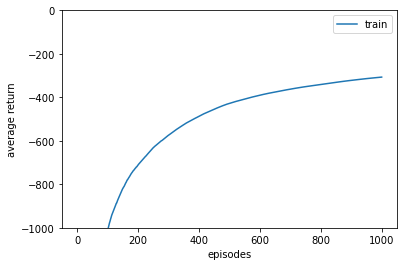

In [25]:
plt.plot(np.average([averages(mountain_car_agent().train(1000)) for i in range(5)],axis=0),label='train')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-1000, 0)
plt.legend()
plt.show()